<a href="https://colab.research.google.com/github/paulodesouzajose/FinML/blob/main/PO_245_FinML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Bloco de importação dos pacotes e bibliotecas
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Insurance Asset Liability Management: uma aplicação de aprendizado de máquina à estruturação de estratégia de investimentos para o setor de seguros**


## **PO 245 - Aprendizado de Máquina em Finanças Quantitativas** 

###Projeto | Etapa I

##1.   Formalização do Problema
  ### 1.1   Contextualização
O mercado de seguros brasileiro vive cotidianamente um 
importante dilema no que tange à gestão de ativos e passivos, principalmente pelas características específicas do setor quanto aos limites regulatórios referentes às aplicações de ativos e ainda à característica e natureza comportamental de seu passivo. Antes de explorarmos a fundo tal dilema, é preciso detalhar de maneira breve como uma empresa do setor atua.\
  A empresa atuante neste setor, usualmente é conhecida como seguradora. A seguradora ocupa uma importante posição na sociedade proporcionando estabilidade financeira perante acontecimentos imprevistos, indesejáveis e imensuráveis. Tal oferta de estabilidade financeira é realizada em troca de um valor monetário, valor este que é denominado prêmio. Os acontecimentos imprevistos, indesejáveis e imensuráveis são conhecidos como sinistros, estes que estão cobertos em acordância com a cobertura contratada perante a seguradora, observando sempre o limite de indenização estabelecido. O fluxo generalizado de operação de uma seguradora pode ser visto na figura 1 abaixo.


(-0.5, 537.5, 338.5, -0.5)

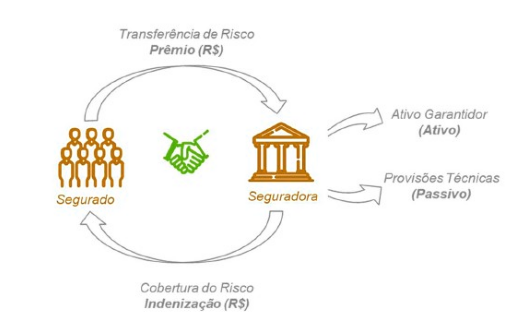

In [2]:
# Plot de imagem do fluxo geral de uma seguradora
img_fluxo = cv2.imread("/content/Imagens/fluxo_seguro.jpg")
plt.imshow(img_fluxo, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


*Figura 1: Fluxo generalizado de operação de uma seguradora.*

Com base nesta explanação inicial do funcionamento de uma seguradora, temos a identificação do componente base do dilema anteriormente citado: O recebimento do prêmio, apesar de estar à mercê do risco de crédito, é dado como previsível em um horizonte temporal definido. Por outro lado, o desembolso a titulo de indenização de sinistro, não o é, pois tal concretização deste evento sofre das consequências estocásticas, ou seja, não é possível realizar a previsão, *a priori*.\
  Para tal descasamento de fluxo de caixa e visando garantir a estabilidade dos resultados da operação, as seguradoras realizam estimativas majoritariamente estatísticas, utilizando médias simples e/o ponderadas, para constituir uma provisão para sinistros, constituição esta que terá como contraparte, parte do prêmio do segurado, tal parcela do prêmio que será atribuída à provisão é denominada como ativo garantidor, e são os ativos garantidores que serão investidos com o objetivo de obter receita financeira, potencializando, caso a estratégia adotada seja eficiente, o resultado gerado pela operação, resultado operacional, e ainda honrando as saídas futuras de caixa. A relação entre o ativo garantidor e as saídas futuras de caixa pode ser vista na figura 2 abaixo.

(-0.5, 651.5, 242.5, -0.5)

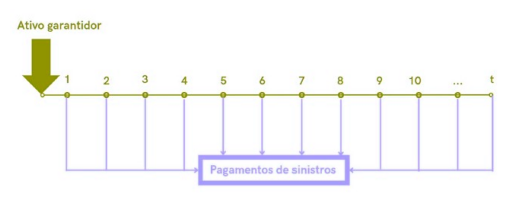

In [3]:
# Plot de imagem do fluxo de pagamentos

img_CF = cv2.imread("/content/Imagens/fluxo_pgto.jpg")
plt.imshow(img_CF, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


  *Figura 2: Representação do modelo de fluxo de caixa*

O dilema entre a gestão de ativos e passivos é conhecido como Asset Liability Management, o qual tem seu objetivo básico definido [1] como a busca pela melhor alocação de um volume de recursos em um portfólio de ativos quando essa alocação não é livre. No caso específico do setor de seguros, a alocação é restringida pelas saídas de caixa as quais são, em sua grande parte, pagamentos de indenizações de sinistros, que possuem natureza aleatória. Completando as características do setor, ainda temos restrições impostas pelo órgão regulador máximo nacional para seguros, Conselho Monetário Nacional - CMN, quanto aos limites de investimento dos ativos garantidores observando as classes dos ativos disponíveis. Tais restrições podem ser encontradas na resolução 4.444/2015, que estão disponíveis abaixo na tabela 1:

(-0.5, 528.5, 331.5, -0.5)

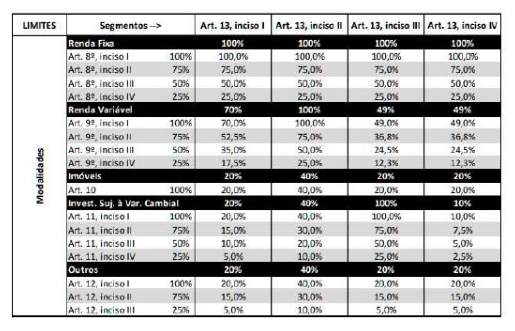

In [4]:
# Plot de imagem dos limites regulatórios existentes

img_tabela1 = cv2.imread("/content/Imagens/resol_4.444_2015.jpg")
plt.imshow(img_tabela1, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


  *Tabela 1: Modalidades de investimento e os respectivos limites de acordo com a Resolução CMN 4.444/2015*
  
  ### 1.2   Motivação
  Tal iniciativa é motivada pelo fato de que a gestão dos ativos e passivos de uma seguradora assume papel fundamental para um bom gerenciamento da companhia em termos estratégicos, financeiros e de solvência. O principal resultado é o que advém da operação principal, chamado de operacional, porém, com uma estratégia bem definida de investimentos, é possível potencializar tal resultado gerando ainda mais valor aos acionistas e garantindo o cumprimento dos requisitos regulatórios e operacionais.\
  Obter resultado financeiro positivo é um desafio para muitas empresas do setor, principalmente pelo fato do mercado de valores mobiliários apresentar volatilidade. As seguradoras de maior porte possuem áreas específicas para desempenhar tal atividade, devido a sua alta importância.\
  A inserção do Aprendizado de Máquina no mundo de seguros vem paulatinamente ganhando expressão. Ele está presente na maioria dos casos em atividades relacionadas à precificação. Por outro lado, a presença de AM em áreas financeiras ainda é relativamente baixa, havendo então oportunidade para sua aplicação para esta finalidade.\
  As opções disponíveis de ativos para investimento são de grande variedade e estão sendo atualizadas a todo momento, o que incrementa ainda mais o desafio para eleger uma estratégia vencedora dentre tantas combinações e cenários disponíveis.

  ### 1.3   Importância
  A relevância do assunto para o setor de seguros é elevada, pois, como já mencionado anteriormente, é uma alternativa existente que pode potencializar o resultado e o valor da companhia para o acionista. Por outro lado, se a estratégia de investimentos não for bem estruturada, pode-se colocar em risco a saúde financeira da companhia, em termos de fluxo de caixa e solvência, bem como destruir resultado e valor.\
  Essa importante vertente envolve diversas áreas dentro de uma seguradora, é um desafio multidisciplinar, pois os decisores sob a ótica do ativo necessitam de insumos sob a ótica do passivo para a tomada de decisão e esses insumos são provenientes de outras áreas, muitas vezes até atualizados diariamente de acordo com a dinâmica de seu portfólio de clientes e respectivas indenizações.

##2.   Objetivo
O objetivo do presente projeto é desenvolver um algoritmo de Aprendizado de Máquina aplicado à estruturação e manutenção de estratégia de investimentos para o setor de seguros, considerando os desafios impostos pelas restrições de ativos sob a ótica regulatória bem como as restrições de passivo sob a ótica da dinâmica de saídas de caixa para indenização de sinistros, almejando a obtenção do maior resultado financeiro possível ao longo do tempo, respeitando todas as restrições existentes. O referido objetivo é o principal a ser atingido através do conceito de *Asset Liability Management* aplicado ao setor de seguros.

##3.   Revisão Bibliográfica

 ### 3.1 Gerenciamento de Ativos e Passivos - Asset Liability Management (ALM)
A pesquisa pelo equilíbrio entre investimentos, garantia da liquidez de ativos e aumento do valor de mercado da empresa é uma tarefa difícil, mas de extrema importância para diversos negócios. Problemas de gestão de ativos e passivos, ou ainda Asset Liability Management – ALM, têm como principal obstáculo incertezas de mercado [2].
Tais passivos devem ser cobertos em todos os momentos do futuro e não apenas pelos valores dos ativos de hoje [3], ou seja, é de extrema importância a disponibilidade de recursos quando os pagamentos do passivo incorrerem, hoje ou no futuro, isto caracteriza a liquidez de uma companhia.\
Diversas pesquisas vêm sendo desenvolvidas buscando a otimização de investimentos de bancos e seguradoras, considerando as condições dos mais diversos cenários. Nos EUA, a quantidade de fundos de pensão que têm déficit de mais de $50M para cumprir com suas obrigações para com os beneficiários aumentou consideravelmente, quando foram comparados dados de 2000 e 2004 [4]. A técnica aqui abordada, ALM, foi introduzida em meados da década de 1970, por instituições financeiras e desde então se tornou de extrema importância no que tange a gestão de risco [5].\
Tendo em vista a necessidade de manter-se a liquidez e a rentabilidade do negócio, e ainda aumentar os lucros, um gerenciamento adequado de ativos é fundamental, e para tal gerenciamento, é necessário o desenvolvimento de um processo para sua estruturação. Muitos modelos de otimização da alocação de ativos foram desenvolvidos. Os modelos são classificados em quatro categorias, de acordo com o horizonte de otimização e as condições sob as quais o problema é modelado: modelo de período único, modelo de períodos múltiplos, modelo estático e modelo estocástico [6]. O presente projeto se encaixa na classificação de um modelo de período único e sob condições estáticas.\
A estratégia de Dedicação exige um equilíbrio entre fluxos de entrada e saída. Este modelo assume que todos os títulos sejam mantidos até o vencimento. A estratégia de Imunização baseia-se em reduzir a volatilidade do superávit obtido, protegendo os investimentos das flutuações
de taxas de juros, por exemplo. Esta Imunização é feita associando os prazos dos ativos e dos passivos. O gerenciamento de lacunas mede a diferença entre os valores de passivos e ativos, com o objetivo de manter a diferença dentro de limites aceitáveis. O modelo de ALM pode ser determinístico ou estocástico, sendo que modelos determinísticos usam programação linear e
consideram a concretização de eventos aleatórios. Os modelos lineares, apesar de relativamente simples, são ostensivamente utilizados para otimização do processo [7] [8]. Alguns autores também têm adotado modelos estocásticos na modelagem de passivos [9] [10]. É possível notar que o desenvolvimento de pesquisas em ALM têm agregado otimização multiobjetivo. Além do objetivo patente de aumentar o lucro líquido, têm sido incorporados objetivos distintos, como a redução de riscos, ou a manutenção da participação de mercado [11]. Já o trabalho de Amaral e Gartner [12], propõe uma metodologia de seleção de investimentos que
considera além do lucro, o impacto socioambiental. Nos casos mencionados, no entanto, a programação linear convencional não é suficiente para processar os problemas, tendo sido adotados modelos de programação por metas e modelos de algoritmos evolutivos. A complexidade dos problemas e os custos computacionais envolvidos tendem a ser maiores. Kosmidou and Zopoudinis [2] estudaram um cenário de otimização para um banco na Grécia, utilizando dados correspondentes a um ano e adotando um modelo de programação linear. Pela simplicidade do modelo, as variáveis adotadas são familiares para os tomadores de decisão, o que torna o modelo aplicável na realidade. Os dados utilizados na literatura analisada usualmente correspondem a períodos não tão longos, 60 meses ou menos. Isto acontece porque a inclusão de séries históricas de dados tornaria o problema mais complexo e não necessariamente aumentaria a precisão do modelo, ao contrário, é preciso considerar também que há mudanças nos padrões operacionais das companhias ao longo do tempo tanto de ativos, e principalmente, quanto de passivos. Logo, considerar períodos longos em demasia pode nos levar a conclusões equivocadas ou inexatas. A maioria dos trabalhos referentes a ALM encontrados na literatura foram realizados para bancos, mas como destacado por Habart et al [13], a técnica de ALM tornou-se fundamental tanto para bancos quanto seguradoras. No presente projeto, será realizada a avaliação especificamente para o segundo cenário, seguradoras. Os princípios do ALM são parecidos para os dois tipos de instituições, mas existem algumas diferenças importantes. Dentre as principais diferenças, no caso de uma seguradora, existe a imprevisibilidade do valor a ser pago e quando será pago no caso de sinistro, o que torna a modelagem dos passivos desafiadora. Em contrapartida, como um seguro normalmente é pago no momento da contratação e o pagamento de prêmio está diretamente associado à condição obrigatória para que ocorra a indenização, o problema de inadimplência, que corresponde a um risco relevante na modelagem de ALM para bancos, é de menor impacto no caso
de seguradoras.

 ### 3.2 Aprendizado de Máquina aplicado a Asset Liability Management
  A missão de realizar o gerenciamento ótimo de ativos e passivos (Asset Liability Management) é ainda mais complexa quando tratamos do universo de seguros. A busca pela otimização do retorno não é o único objetivo a ser atingido como acontece comumente no mundo de finanças corporativas. Segundo Abrate [13], as ferramentas financeiras utilizadas para alocação de ativos como, por exemplo, a Teoria do Portfolio Moderno - acrônimo em inglês MPT, são inadquadas considerando as características específicas de seguradoras. Ainda de acordo com Abrate [13], existem dois principais pontos de atenção, primeiro: a Teoria de Markowitz não leva em consideração os passivos e tão pouco os fluxos de caixa futuros negativos que tais passivos geram; Segundo, a teoria assume um único ponto de decisão onde o portfólio é otimizado.\
  Dado o cenário particular e as idiossincrasias encontradas no setor segurador, segundo Fontoura [14], tal abordagem pode ser modelada sob a perspectiva de Processo de Decisão de Markov - MDP, onde a cada passo temporal afeta o estágio inicial através de uma ação adotada pelo agente que acarretará a obtenção de um estágio subsequente gerando uma respectiva recompensa. Seguindo a linha de raciocínio, Sutton e Barto [15] definem o MDP como sendo a formalização clássica de uma sequência de decisões realizadas, onde as ações influenciam não somente a recompensa imeditada, mas também situações, ou ainda estados, subsequentes.\
  Isto posto, Abrate [13] afirma que apesar de existirem diversas maneiras para se resolver a MDP, como programação linear e dinâmica, para sistema complexos, a Aprendizagem por Reforço é a abordagem padrão para enfrentar tal desafio.\
  Abrate [13], Shang [16], Fontoura [14] e Snow [17] propuseram metodologias similares realizando o uso de Aprendizagem por Reforço para resolver o referido desafio e obtiveram resultados satisfatórios perante outras metodologias já consolidadas. Tais trabalhos contribuirão para este projeto sob o ponto de vista técnico e de conhecimento, e ainda mais, pois os três últimos apresentam publicamente o repositório contendo os códigos e os dados utilizados para que a análise seja replicada.\
  A definição pela abordagem da Aprendizagem por Reforço se dá primeiramente pelo fato de ser um tema recente e ainda a ser explorado. O estado-da-arte consiste em evoluir as aplicações de Programação Dinâmica Multiestágio - MSP, onde segundo Fontoura [14] há necessidade da geração de árvore de cenários e discretização o que acarreta diversos problemas quando tratamos de muitas variáveis ou então longos horizontes temporais, dado que o número de cenários aumenta exponencialmente. Então a aplicação de Aprendizagem por Reforço ocupa uma posição de candidata a ser o novo estado-da-arte e os resultados obtidos a partir dos trabalhos já realizados são bastante promissores.
##4.   Base de dados
###  4.1 Descrição
  Os dados necessários para realização deste projeto consistem em duas partes, a primeira para dados relacionados às alternativas de investimentos, ou seja, sob a ótica do ativo. Aqui serão consideradas as variações das cotações históricas obtidas a partir das plataformas ComDinheiro e IpeaData dos índices financeiros representativos das categorias de Renda Fixa, Renda Variável e Imóvel. Tais índices para Renda Fixa são: IPCA, IRF-M, IMA-S, IMA-B e IMA-B 5+; Renda varíavel, IBOV; Para Imóveis, IFIX. Para Investimentos sujeitos à variação cambial adotou-se BRL/USD.\
   A segunda parte, por sua vez, está sob a ótica do passivo, e se trata das saídas do fluxo de caixa, pagamento de sinistros por falecimento, para este projeto, exclusivamente. Neste projeto especificamente, tais saídas se darão com base em tábuas atuarias utilizadas amplamente em seguradoras, principalmente as que possuem portfolio de seguros de vida. As referidas tábuas atuariais foram obtidas a partir do repositório oficial do Instituto Brasileiro de Atuária.\
  Tábuas atuariais consistem em uma estimativa de probabilidade partindo da idade x e chegar-se vivo até determinada idade x + n, com base nas probabilidades serão calculadas as indenizações por falecimento e consequentemente as saídas de fluxo de caixa.

 ### 4.2 Análise Exploratória de Dados


#### 4.2.1 Dados COMDINHEIRO

##### 4.2.1.1 ÍNDICE ANBIMA: IMAB (NTN-B)

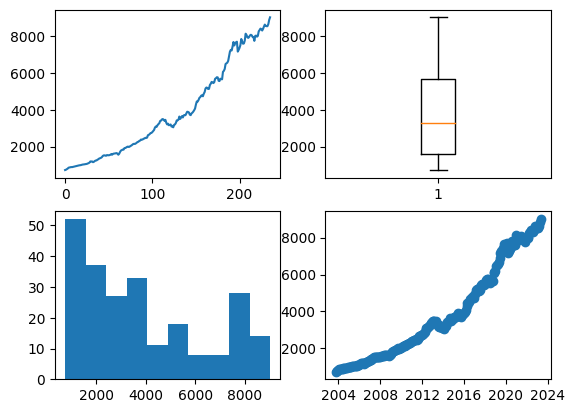

0       732.134779
1       749.921194
2       780.713506
3       811.970067
4       859.640824
          ...     
231    8536.599187
232    8536.526930
233    8645.939192
234    8876.237983
235    9017.320445
Name: ANBIMA_IMAB, Length: 236, dtype: float64


count     236.000000
mean     3884.333270
std      2505.744981
min       732.134779
25%      1626.125809
50%      3259.499890
75%      5683.618454
max      9017.320445
Name: ANBIMA_IMAB, dtype: float64

In [8]:
# Plot dos dados referentes ao IMAB

IMAB = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_ANBIMA.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IMAB["ANBIMA_IMAB"])
axis[0,1].boxplot(IMAB["ANBIMA_IMAB"])
axis[1,0].hist(IMAB["ANBIMA_IMAB"])
axis[1,1].scatter(IMAB["Data"],IMAB["ANBIMA_IMAB"])

plt.show()

# Plot de amostra

print(IMAB["ANBIMA_IMAB"])

# Plot das estatísticas descritivas

IMAB["ANBIMA_IMAB"].describe()


##### 4.2.1.2 ÍNDICE ANBIMA: IMAB 5+ (NTN-B 5+)

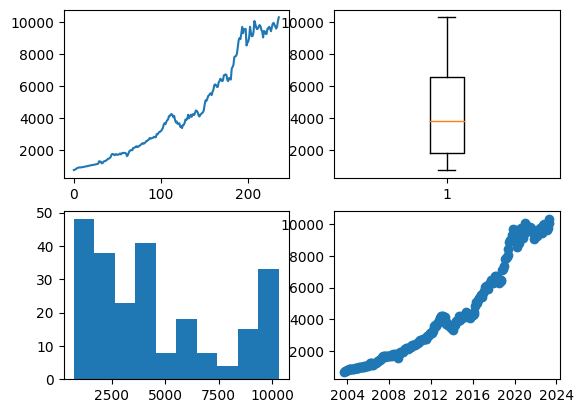

0        724.673982
1        742.633530
2        775.111058
3        807.749966
4        858.288352
           ...     
231     9729.417360
232     9606.702498
233     9718.644255
234    10080.684116
235    10309.692796
Name: ANBIMA_IMAB5+, Length: 236, dtype: float64


count      236.000000
mean      4499.036372
std       3045.149779
min        724.673982
25%       1785.595782
50%       3809.477596
75%       6543.528111
max      10309.692796
Name: ANBIMA_IMAB5+, dtype: float64

In [9]:
# Plot dos dados referentes ao IMAB 5+

IMAB5 = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_ANBIMA.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IMAB5["ANBIMA_IMAB5+"])
axis[0,1].boxplot(IMAB5["ANBIMA_IMAB5+"])
axis[1,0].hist(IMAB5["ANBIMA_IMAB5+"])
axis[1,1].scatter(IMAB5["Data"],IMAB5["ANBIMA_IMAB5+"])

plt.show()

# Plot de amostra

print(IMAB5["ANBIMA_IMAB5+"])

# Plot das estatísticas descritivas

IMAB5["ANBIMA_IMAB5+"].describe()

##### 4.2.1.3  ÍNDICE ANBIMA: IMAS (LFT)

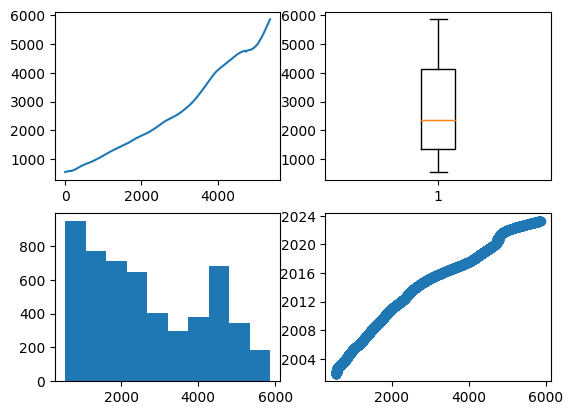

        DataRef       Indice
0    2001-12-03   550.485024
1    2001-12-04   550.859030
2    2001-12-05   551.248000
3    2001-12-06   551.631195
4    2001-12-07   552.008819
...         ...          ...
5365 2023-04-12  5848.900156
5366 2023-04-13  5851.591936
5367 2023-04-14  5854.347014
5368 2023-04-17  5856.954985
5369 2023-04-18  5859.809285

[5370 rows x 2 columns]


,Indice
count,5370.000000
mean,2662.524752
std,1507.215312
min,550.485024
25%,1364.311246
50%,2365.106017
75%,4126.156018
max,5859.809285


In [ ]:
# Plot dos dados referentes ao IMAS

IMAS = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_ANBIMA.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IMAS["Indice"])
axis[0,1].boxplot(IMAS["Indice"])
axis[1,0].hist(IMAS["Indice"])
axis[1,1].scatter(IMAS["Indice"],IMAS["DataRef"])

plt.show()

# Plot de amostra

print(IMAS)

# Plot das estatísticas descritivas

IMAS.describe()

##### 4.2.1.4 ÍNDICE ANBIMA: IRFM (LTN/NTN-F)

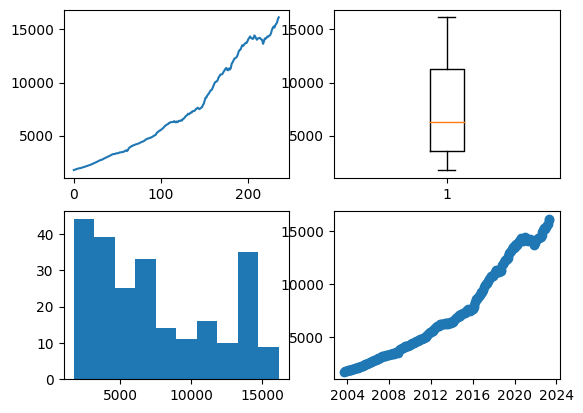

0       1754.319169
1       1786.143343
2       1824.248821
3       1850.075693
4       1871.126775
           ...     
231    15400.582715
232    15529.494053
233    15663.384816
234    15999.459740
235    16147.544696
Name: ANBIMA_IRFM, Length: 236, dtype: float64


count      236.000000
mean      7448.041937
std       4351.216668
min       1754.319169
25%       3540.787064
50%       6321.146620
75%      11250.288460
max      16147.544696
Name: ANBIMA_IRFM, dtype: float64

In [10]:
# Plot dos dados referentes ao IRFM

IRFM = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_ANBIMA.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IRFM["ANBIMA_IRFM"])
axis[0,1].boxplot(IRFM["ANBIMA_IRFM"])
axis[1,0].hist(IRFM["ANBIMA_IRFM"])
axis[1,1].scatter(IRFM["Data"],IRFM["ANBIMA_IRFM"])

plt.show()

# Plot de amostra

print(IRFM["ANBIMA_IRFM"])

# Plot das estatísticas descritivas

IRFM["ANBIMA_IRFM"].describe()

##### 4.2.1.5 ÍNDICE IBGE: IPCA

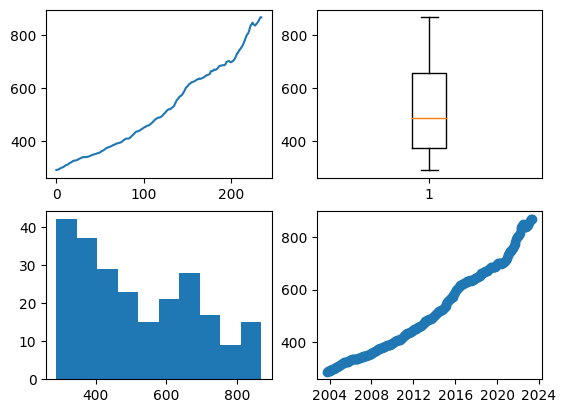

          Data   IBGE_IPCA
0   2003-09-30  289.408777
1   2003-10-31  290.248062
2   2003-11-28  291.234905
3   2003-12-31  292.749327
4   2004-01-30  294.974222
..         ...         ...
231 2022-12-30  850.113194
232 2023-01-31  854.618794
233 2023-02-28  861.797592
234 2023-03-31  867.916355
235 2023-04-28  867.916355

[236 rows x 2 columns]


,IBGE_IPCA
count,236.000000
mean,521.074040
std,165.076902
min,289.408777
25%,374.512801
50%,488.009771
75%,656.209437
max,867.916355


In [15]:
# Plot dos dados referentes ao IPCA

IPCA = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_IPCA.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IPCA["IBGE_IPCA"])
axis[0,1].boxplot(IPCA["IBGE_IPCA"])
axis[1,0].hist(IPCA["IBGE_IPCA"])
axis[1,1].scatter(IPCA["Data"],IPCA["IBGE_IPCA"])

plt.show()

# Plot de amostra

print(IPCA)

# Plot das estatísticas descritivas

IPCA.describe()

##### 4.2.1.6 ÍNDICE B3: IBOV

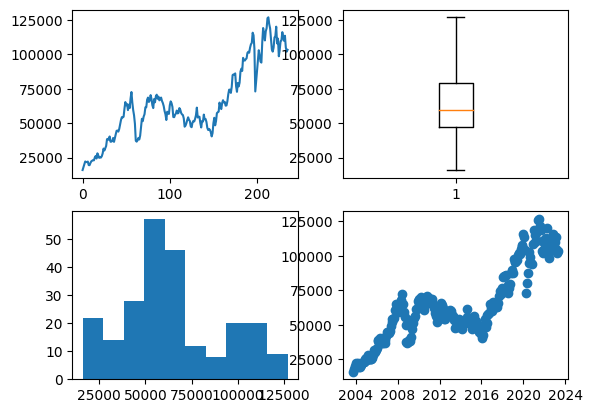

          Data    IBOV
0   2003-09-30   16010
1   2003-10-31   17982
2   2003-11-28   20183
3   2003-12-31   22236
4   2004-01-30   21851
..         ...     ...
231 2022-12-30  109734
232 2023-01-31  113430
233 2023-02-28  104931
234 2023-03-31  101882
235 2023-04-28  103220

[236 rows x 2 columns]


,IBOV
count,236.000000
mean,64374.779661
std,26968.042949
min,16010.000000
25%,47415.000000
50%,59497.500000
75%,79250.500000
max,126801.000000


In [14]:
# Plot dos dados referentes ao IBOV

IBOV = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_IBOV.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IBOV["IBOV"])
axis[0,1].boxplot(IBOV["IBOV"])
axis[1,0].hist(IBOV["IBOV"])
axis[1,1].scatter(IBOV["Data"],IBOV["IBOV"])

plt.show()

# Plot de amostra

print(IBOV)

# Plot das estatísticas descritivas

IBOV.describe()

##### 4.2.1.7 ÍNDICE B3: IFIX

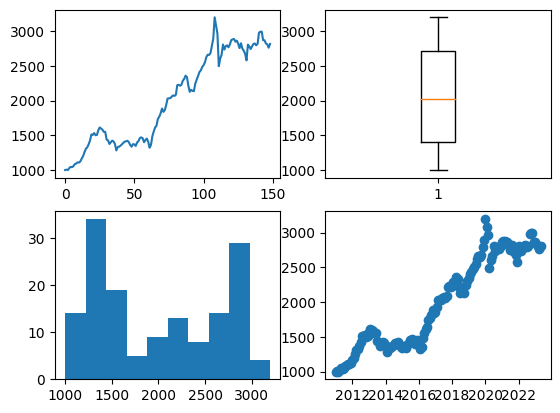

          Data  IFIX
0   2010-12-31  1000
1   2011-01-31  1006
2   2011-02-28  1000
3   2011-03-31  1028
4   2011-04-29  1046
..         ...   ...
144 2022-12-30  2867
145 2023-01-31  2821
146 2023-02-28  2808
147 2023-03-31  2760
148 2023-04-28  2814

[149 rows x 2 columns]


,IFIX
count,149.000000
mean,2000.456376
std,651.789330
min,1000.000000
25%,1409.000000
50%,2028.000000
75%,2715.000000
max,3197.000000


In [16]:
# Plot dos dados referentes ao IFIX

IFIX = pd.read_excel('/content/Dados_COMDINHEIRO/COMDINHEIRO_IFIX.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(IFIX["IFIX"])
axis[0,1].boxplot(IFIX["IFIX"])
axis[1,0].hist(IFIX["IFIX"])
axis[1,1].scatter(IFIX["Data"],IFIX["IFIX"])

plt.show()

# Plot de amostra

print(IFIX)

# Plot das estatísticas descritivas

IFIX.describe()

#### 4.2.2 Dados IPEADATA

##### 4.2.2.1 Cotação Cambial Real/Dólar

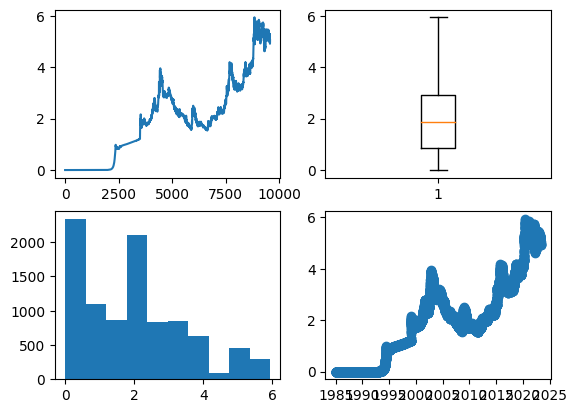

           Data        Cambio
0    1985-01-02  1.152000e-09
1    1985-01-03  1.152000e-09
2    1985-01-04  1.152000e-09
3    1985-01-07  1.173800e-09
4    1985-01-08  1.173800e-09
...         ...           ...
9573 2023-04-13  4.909100e+00
9574 2023-04-14  4.944900e+00
9575 2023-04-17  4.941500e+00
9576 2023-04-18  4.967200e+00
9577 2023-04-19  5.046100e+00

[9578 rows x 2 columns]


,Cambio
count,9.578000e+03
mean,1.957520e+00
std,1.555240e+00
min,1.152000e-09
25%,8.430000e-01
50%,1.877500e+00
75%,2.928400e+00
max,5.936600e+00


In [17]:
# Plot dos dados referentes ao BRL/USD

BRL_USD = pd.read_excel('/content/Dados_IPEADATA/Dolar.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(BRL_USD["Cambio"])
axis[0,1].boxplot(BRL_USD["Cambio"])
axis[1,0].hist(BRL_USD["Cambio"])
axis[1,1].scatter(BRL_USD["Data"],BRL_USD["Cambio"])

plt.show()

# Plot de amostra

print(BRL_USD)

# Plot das estatísticas descritivas

BRL_USD.describe()

#### 4.2.3 Dados IBA

##### 4.2.3.1 AT2000M

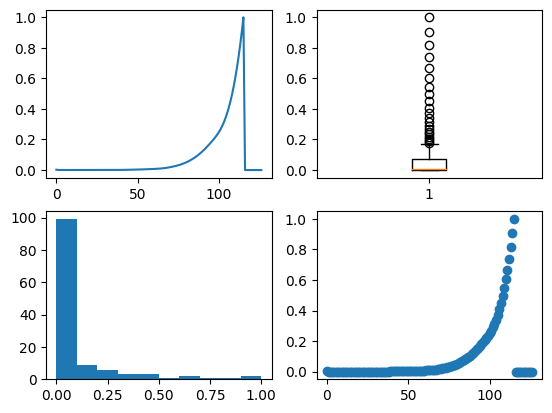

     Idade        qx
0        0  0.002311
1        1  0.000906
2        2  0.000504
3        3  0.000408
4        4  0.000357
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.090880
std,36.805797,0.192760
min,0.000000,0.000000
25%,31.500000,0.000613
50%,63.000000,0.003980
75%,94.500000,0.071074
max,126.000000,1.000000


In [18]:
# Plot dos dados referentes a AT2000M

AT2000M = pd.read_excel('/content/Dados_IBA/AT2000M.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(AT2000M["qx"])
axis[0,1].boxplot(AT2000M["qx"])
axis[1,0].hist(AT2000M["qx"])
axis[1,1].scatter(AT2000M["Idade"],AT2000M["qx"])

plt.show()

# Plot de amostra

print(AT2000M)

# Plot das estatísticas descritivas

AT2000M.describe()

##### 4.2.3.2 AT2000F

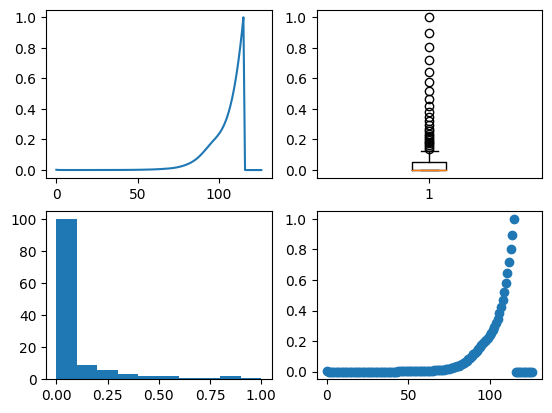

     Idade        qx
0        0  0.001794
1        1  0.000755
2        2  0.000392
3        3  0.000290
4        4  0.000232
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.084896
std,36.805797,0.188048
min,0.000000,0.000000
25%,31.500000,0.000340
50%,63.000000,0.002079
75%,94.500000,0.053733
max,126.000000,1.000000


In [19]:
# Plot dos dados referentes ao AT2000F

AT2000F = pd.read_excel('/content/Dados_IBA/AT2000F.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(AT2000F["qx"])
axis[0,1].boxplot(AT2000F["qx"])
axis[1,0].hist(AT2000F["qx"])
axis[1,1].scatter(AT2000F["Idade"],AT2000F["qx"])

plt.show()

# Plot de amostra

print(AT2000F)

# Plot das estatísticas descritivas

AT2000F.describe()

##### 4.2.3.3 AT49M

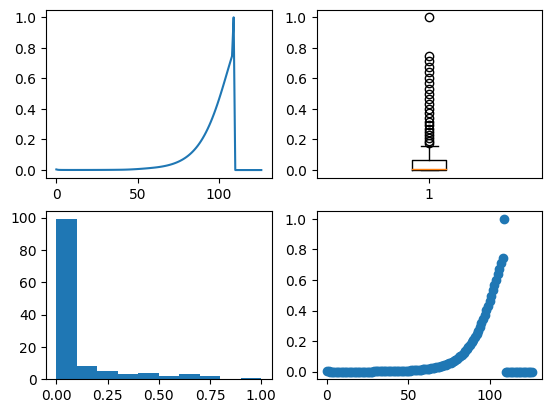

     Idade        qx
0        0  0.004040
1        1  0.001580
2        2  0.000887
3        3  0.000715
4        4  0.000627
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.092968
std,36.805797,0.188916
min,0.000000,0.000000
25%,31.500000,0.000614
50%,63.000000,0.004116
75%,94.500000,0.068292
max,126.000000,1.000000


In [20]:
# Plot dos dados referentes a AT49M

AT49M = pd.read_excel('/content/Dados_IBA/AT49M.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(AT49M["qx"])
axis[0,1].boxplot(AT49M["qx"])
axis[1,0].hist(AT49M["qx"])
axis[1,1].scatter(AT49M["Idade"],AT49M["qx"])

plt.show()

# Plot de amostra

print(AT49M)

# Plot das estatísticas descritivas

AT49M.describe()

##### 4.2.3.4 AT49F

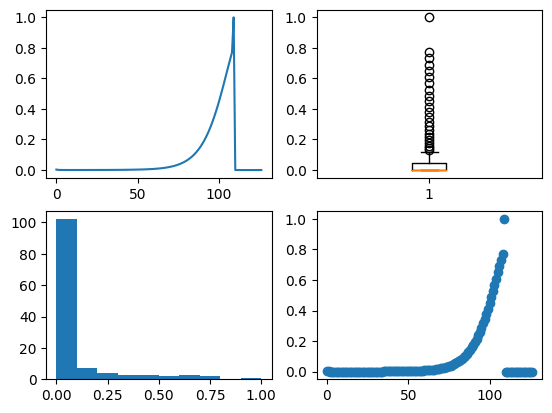

     Idade        qx
0        0  0.003210
1        1  0.001360
2        2  0.000703
3        3  0.000521
4        4  0.000419
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.085966
std,36.805797,0.188707
min,0.000000,0.000000
25%,31.500000,0.000365
50%,63.000000,0.002391
75%,94.500000,0.046982
max,126.000000,1.000000


In [21]:
# Plot dos dados referentes a AT49F

AT49F = pd.read_excel('/content/Dados_IBA/AT49F.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(AT49F["qx"])
axis[0,1].boxplot(AT49F["qx"])
axis[1,0].hist(AT49F["qx"])
axis[1,1].scatter(AT49F["Idade"],AT49F["qx"])

plt.show()

# Plot de amostra

print(AT49F)

# Plot das estatísticas descritivas

AT49F.describe()

##### 4.2.3.5 BREMSMT2021M

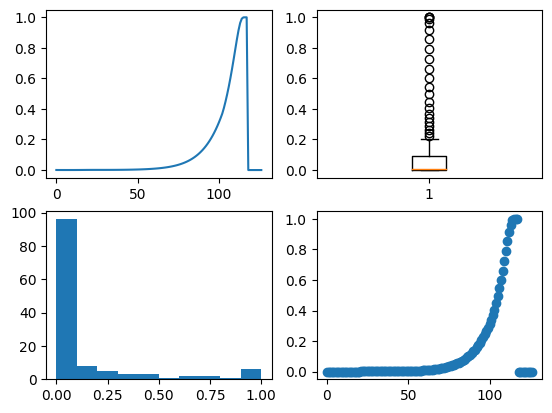

     Idade        qx
0        0  0.000371
1        1  0.000242
2        2  0.000213
3        3  0.000199
4        4  0.000192
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.124946
std,36.805797,0.255589
min,0.000000,0.000000
25%,31.500000,0.001011
50%,63.000000,0.005098
75%,94.500000,0.088879
max,126.000000,1.000000


In [22]:
# Plot dos dados referentes a BREMSMT2021M

BREMSMT2021M = pd.read_excel('/content/Dados_IBA/BREMSMT2021M.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(BREMSMT2021M["qx"])
axis[0,1].boxplot(BREMSMT2021M["qx"])
axis[1,0].hist(BREMSMT2021M["qx"])
axis[1,1].scatter(BREMSMT2021M["Idade"],BREMSMT2021M["qx"])

plt.show()

# Plot de amostra

print(BREMSMT2021M)

# Plot das estatísticas descritivas

BREMSMT2021M.describe()

##### 4.2.3.6 BREMSMT2021F

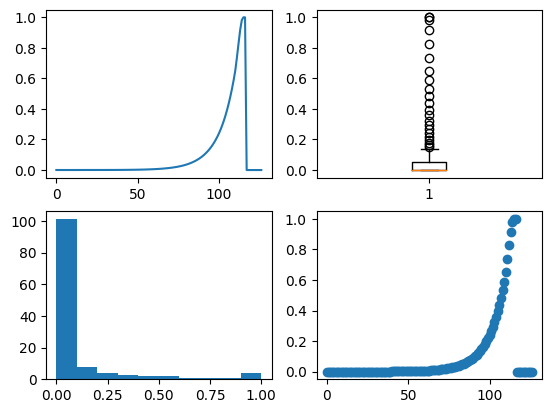

     Idade        qx
0        0  0.000355
1        1  0.000226
2        2  0.000195
3        3  0.000180
4        4  0.000171
..     ...       ...
122    122  0.000000
123    123  0.000000
124    124  0.000000
125    125  0.000000
126    126  0.000000

[127 rows x 2 columns]


,Idade,qx
count,127.000000,127.000000
mean,63.000000,0.098061
std,36.805797,0.221246
min,0.000000,0.000000
25%,31.500000,0.000429
50%,63.000000,0.003001
75%,94.500000,0.054941
max,126.000000,1.000000


In [23]:
# Plot dos dados referentes a BREMSMT2021F

BREMSMT2021F = pd.read_excel('/content/Dados_IBA/BREMSMT2021F.xlsx')

figure, axis = plt.subplots(2,2)

axis[0,0].plot(BREMSMT2021F["qx"])
axis[0,1].boxplot(BREMSMT2021F["qx"])
axis[1,0].hist(BREMSMT2021F["qx"])
axis[1,1].scatter(BREMSMT2021F["Idade"],BREMSMT2021F["qx"])

plt.show()

# Plot de amostra

print(BREMSMT2021F)

# Plot das estatísticas descritivas

BREMSMT2021F.describe()

##### 4.2.3.7 Comparativos entre tábuas de mortalidade

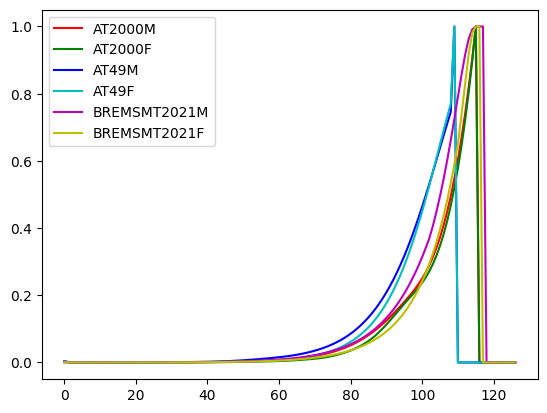

In [24]:
# Plot comparativo das tábuas atuariais

plt.plot(AT2000M["Idade"], AT2000M["qx"], color='r', label='AT2000M')
plt.plot(AT2000F["Idade"], AT2000F["qx"], color='g', label='AT2000F')
plt.plot(AT49M["Idade"], AT49M["qx"], color='b', label='AT49M')
plt.plot(AT49F["Idade"], AT49F["qx"], color='c', label='AT49F')
plt.plot(BREMSMT2021M["Idade"], BREMSMT2021M["qx"], color='m', label='BREMSMT2021M')
plt.plot(BREMSMT2021F["Idade"], BREMSMT2021F["qx"], color='y', label='BREMSMT2021F')
plt.legend()

## 5.   Referências Bibliográficas

[1] MARQUES, Demósthenes. ASSET AND LIABILITY MANAGEMENT (ALM) PARA ENTIDADES FECHADAS DE PREVIDÊNCIA COMPLEMENTAR NO BRASIL: Validação de um modelo de otimização com a aplicação a um caso prático. Brasília, 2011.

[2] ZOPOUNIDIS, K. K. C. (2002) An optimization scenario methodology for bank asset liability management. Operational Research.

[3] WÜTHRICH, Mario V. e MERZ, Michael. (2013) Financial Modeling, Actuarial Valuation and Solvency in Insurance.

[4] BRANDT, J. H. van B. M. W. (2007). Optimal asset allocation in asset liability management. National Bureau of Economics Research.

[5] HABART, Marine Corlosquet et al (2015). Asset and Liability Management for Banks and Insurance Companies.

[6] BHAT, D. A. (2020) A review of asset liability management models. Center for Open Science.

[7] DASH, M.; PATHAK, R. (2009). A linear programming model for assessing asset-liability management in banks. SSRN Electronic Journal, Elsevier BV.

[8] VALLADÃO, D. M.; VEIGA, Á.; VEIGA, G. (2014) A multistage linear stochastic programming model for optimal corporate debt management. European Journal of Operational Research, Elsevier BV, v. 237, n. 1, p. 303–311.

[9] LHUMAIDAH, F. (2015) Asset-liability management for reserves under liquidity constraints:the case of Saudi Arabia. (S.l.: s.n.).

[10] GERSTNER, T. et al (2008). A general asset–liability management model for the efficient simulation of portfolios of life insurance policies. Insurance: Mathematics and Economics, Elsevier BV, v. 42, n. 2, p. 704–716.

[11] GIOKAS, D.; VASSILOGLOU, M. (1991) A goal programming model for bank assets and liabilities management. European Journal of Operational Research, Elsevier BV, v. 50, n. 1, p. 48–60.

[12] AMARAL, F. V. A.; GARTNER, I. R. (2021). Portfolio impact investment management using multi-objective optimization. Pesquisa Operacional, v. 41.

[13] ABRATE, C. (2021);Continuous-Action Reinforcement Learning for Portfolio Allocation of a Life Insurance Company.

[14] FONTOURA, A. (2019); A Deep Reinforcement Learning Approach to Asset-Liability Management.

[15] R. S. Sutton and A. G. Barto. Reinforcement learning: an introduction, 2nd edition. The MIT Press, 2018.

[16] SHANG, K. (2021); Deep Learning for Liability-Driven Investment.

[17] SNOW, D. (2019); Machine Learning in Asset Management.

BRASIL. Resolução nº 4.444 de 13 de novembro de 2015. Brasília: Banco Central do Brasil, 2015. Disponível em: https://www.bcb.gov.br/htms/normativ/Resolucao4444.pdf?r=1. Acesso em 18 de abril de 2023.

http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38590&module=M Acesso em 18 de abril de 2023.


https://www.comdinheiro.com.br/ Acesso em 18 de abril de 2023.

https://atuarios.org.br/tabuas-biometricas/ Acesso em 18 de abril de 2023.